In [3]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
graph = {
    's': {'a': 2, 'b': 1},
    'a': {'s': 3, 'b': 4, 'c': 8},
    'b': {'s': 4, 'a': 2, 'd': 2},
    'c': {'a': 2, 'd': 7, 't': 4},
    'd': {'b': 1, 'c': 11, 't': 5},
    't': {'c': 3, 'd': 5}
}

In [12]:
g2 = {'a': {'s': 3, 'b': 4, 'c': 8}, 'b': {'s': 4, 'a': 2, 'd': 2}, 'c': {'a': 2, 'd': 7, 't': 4}, 'd': {'b': 1, 'c': 11, 't': 5}, 's': {'a': 2, 'b': 1}, 't': {'c': 3, 'd': 5}}

In [200]:
G = nx.DiGraph()

for src in graph:
    G.add_node(src,name=src)
    for dst in graph[src]:
        weight = graph[src][dst]
        print('adding edge:',src,'->',dst,'=',weight)
        G.add_edge(src,dst,weight=weight)

adding edge: s -> a = 2
adding edge: s -> b = 1
adding edge: a -> s = 3
adding edge: a -> b = 4
adding edge: a -> c = 8
adding edge: b -> s = 4
adding edge: b -> a = 2
adding edge: b -> d = 2
adding edge: c -> a = 2
adding edge: c -> d = 7
adding edge: c -> t = 4
adding edge: d -> b = 1
adding edge: d -> c = 11
adding edge: d -> t = 5
adding edge: t -> c = 3
adding edge: t -> d = 5


In [198]:
G.nodes()

['s', 'a', 'b', 'c', 'd', 't']

In [188]:
G.node['s']['name'] = 'foo'

In [190]:
G.node['s']

{'name': 'foo'}

In [199]:
G.edges()

[('s', 'a'),
 ('s', 'a'),
 ('s', 'b'),
 ('s', 'b'),
 ('a', 'b'),
 ('a', 'b'),
 ('a', 'c'),
 ('a', 'c'),
 ('b', 'd'),
 ('b', 'd'),
 ('c', 'd'),
 ('c', 'd'),
 ('c', 't'),
 ('c', 't'),
 ('d', 't'),
 ('d', 't')]

In [194]:
G['s']['a']

{'weight': 2}

In [195]:
G['a']['s']

{'weight': 3}

In [209]:
g.edges()

[('s', 'a'),
 ('s', 'b'),
 ('a', 's'),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 's'),
 ('b', 'a'),
 ('b', 'd'),
 ('c', 'a'),
 ('c', 'd'),
 ('c', 't'),
 ('d', 'b'),
 ('d', 'c'),
 ('d', 't'),
 ('t', 'c'),
 ('t', 'd')]

KeyError: 0

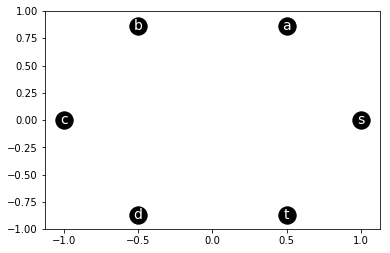

In [208]:
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'k', node_size = 300, alpha = 1)
# labels
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif', font_color='w')
#nx.draw_networkx_edges(G, pos, edgelist = [(0,1)], width = 2, alpha = 0.5, edge_color='b')
#nx.draw_networkx_edges(G, pos, edgelist= [(1,0)], width = 1, alpha = 1)
plt.axis('off')
plt.show() 

ValueError: too many values to unpack (expected 2)

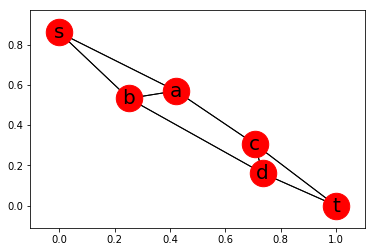

In [197]:
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.axis('off')
#plt.savefig("weighted_graph.png") # save as png
plt.show() # display

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


TypeError: draw_networkx_labels() missing 1 required positional argument: 'pos'

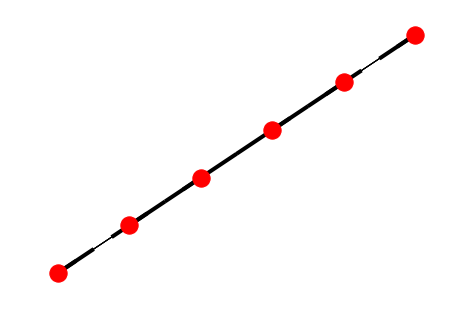

In [163]:
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_labels(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [7]:
def shortestpath(graph, src, dst, visited=[], distances={}, predecessors={}):
    return 0

In [6]:
debug = 0

In [15]:
def dijkstra(graph, src, dst, visited=[], distances={}, predecessors={}):
    """ calculates a shortest path tree rooted at src
    """
    
    #print('dijkstra() src:',src,'dst:',dst)
    if src not in graph:
        raise TypeError('The root of the shortest path tree cannot be found')
    if dst not in graph:
        raise TypeError('The target of the shortest path cannot be found')
    
    # ending condition
    if src == dst:
        # build the shortest path and display it
        path = []
        pred = dst
        while pred != None:
            path.append(pred)
            pred = predecessors.get(pred, None)
        revd = []
        for i in reversed(path):
            revd.append(i)
        if debug == 1: print('Shortest path:', revd)
        if debug == 1: print('cost:', distances[dst])
        return {'source': revd[0], 'destination': revd[len(revd)-1], 'path': revd, 'cost': distances[dst]}
    else:
        # if initial run, init the cost
        if not visited:
            if debug == 1: print('setting distances[',src,'] = 0')
            distances[src] = 0
            
        # visit the neighbors
        for neighbor in graph[src]:
            if debug == 1: print('visit neighbor:',neighbor)
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if debug == 1: print('distance to',neighbor,'through',src,'(',distances[src],'+',graph[src][neighbor],')','is',new_distance)
                if new_distance < distances.get(neighbor, float('inf')):
                    if debug == 1: print('setting distances[',neighbor,'] =', new_distance)
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
            else:
                if debug == 1: print('skip:',neighbor, 'has been visited')
        
        # mark as visited
        if debug == 1: print('marking',src,'as visited')
        visited.append(src)
            
        # now that all neighbors have been visited: recurse
        # select the non-visited node with lowest distance 'x'
        # run Dijkstra with src='x'
        unvisited = {}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k ,float('inf'))
                if debug == 1: print('unvisited[',k,'] =', unvisited[k])
        x = min(unvisited, key=unvisited.get)
        return dijkstra(graph, x, dst, visited, distances, predecessors)

In [16]:
src = 's'
dst = 't'

In [17]:
sp = dijkstra(graph, src, dst)

In [18]:
sp

{'cost': 8, 'destination': 't', 'path': ['s', 'b', 'd', 't'], 'source': 's'}

In [19]:
sp = dijkstra(g2, src, dst)

In [20]:
sp

{'cost': 8, 'destination': 't', 'path': ['s', 'b', 'd', 't'], 'source': 's'}

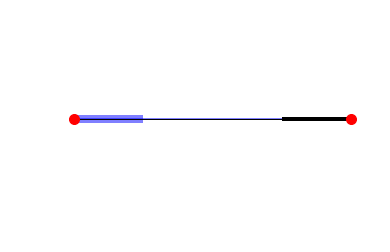

In [210]:
G = nx.DiGraph()
G.add_nodes_from([0,1])
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 100, alpha = 1)
nx.draw_networkx_edges(G, pos, edgelist = [(0,1)], width = 2, alpha = 0.5, edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist= [(1,0)], width = 1, alpha = 1)
plt.axis('off')
plt.show() 